In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!cp /gdrive/MyDrive/tmp/zoom_in_blocks.zip ./

In [ ]:
!ls -al

total 300604
drwxr-xr-x 1 root root      4096 Jul 29 00:37 .
drwxr-xr-x 1 root root      4096 Jul 29 00:37 ..
drwxr-xr-x 4 root root      4096 Jul 13 13:42 .config
drwxr-xr-x 1 root root      4096 Jul 13 13:43 sample_data
-rw------- 1 root root 307795692 Jul 29 00:37 zoom_in_blocks.zip


In [ ]:
!unzip zoom_in_blocks.zip

Archive:  zoom_in_blocks.zip
   creating: zoom_in_blocks/img/
  inflating: zoom_in_blocks/img/IMG_1942.JPG  
  inflating: zoom_in_blocks/img/IMG_1946.JPG  
  inflating: zoom_in_blocks/img/IMG_1948.JPG  
  inflating: zoom_in_blocks/img/IMG_1949.JPG  
  inflating: zoom_in_blocks/img/IMG_1954.JPG  
  inflating: zoom_in_blocks/img/IMG_1955.JPG  
  inflating: zoom_in_blocks/img/IMG_1956.JPG  
  inflating: zoom_in_blocks/img/IMG_1957.JPG  
  inflating: zoom_in_blocks/img/IMG_1958.JPG  
  inflating: zoom_in_blocks/img/IMG_1959.JPG  
  inflating: zoom_in_blocks/img/IMG_1960.JPG  
  inflating: zoom_in_blocks/img/IMG_1961.JPG  
  inflating: zoom_in_blocks/img/IMG_1962.JPG  
  inflating: zoom_in_blocks/img/IMG_1963.JPG  
  inflating: zoom_in_blocks/img/IMG_1964.JPG  
  inflating: zoom_in_blocks/img/IMG_1965.JPG  
  inflating: zoom_in_blocks/img/IMG_1966.JPG  
  inflating: zoom_in_blocks/img/IMG_1967.JPG  
  inflating: zoom_in_blocks/img/IMG_1968.JPG  
  inflating: zoom_in_blocks/img/IMG_1969.JPG 

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


import random
import pickle
import cv2
import matplotlib


In [ ]:
def my_preprocess_input(image):
  return image/255

BATCH_SIZE = 16

data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=my_preprocess_input
)

iterator = data_aug_generator.flow_from_directory(
      "zoom_in_blocks",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


Found 118 images belonging to 1 classes.


In [ ]:
data_count = len(iterator.labels)
print("data_count :", data_count)

WANTED_MULTIPLE_COUNT = 100
print("WANTED_MULTIPLE_COUNT :", WANTED_MULTIPLE_COUNT)

STEP_COUNT = int(data_count/BATCH_SIZE)+1
print("STEP_COUNT :", STEP_COUNT)

FETCH_COUNT = STEP_COUNT*WANTED_MULTIPLE_COUNT
print("FETCH_COUNT :", FETCH_COUNT)


augmented_x_list = []
for i in range(FETCH_COUNT):
  item = next(iterator)
  augmented_x, _ = item
  augmented_x_list.extend(augmented_x)


# python list를 numpy로 변환
augmented_train_x = np.array(augmented_x_list)


print(augmented_train_x.shape)

data_count : 118
WANTED_MULTIPLE_COUNT : 100
STEP_COUNT : 8
FETCH_COUNT : 800
(11800, 224, 224, 3)


In [ ]:
print(augmented_train_x)

[[[[0.4035912  0.39182645 0.35981074]
   [0.32932803 0.31984395 0.27770802]
   [0.33990425 0.32978228 0.29411766]
   ...
   [0.34901962 0.35686275 0.3529412 ]
   [0.34901962 0.35686275 0.3529412 ]
   [0.34901962 0.35686275 0.3529412 ]]

  [[0.3962979  0.3845332  0.3522822 ]
   [0.33073965 0.32137316 0.27888435]
   [0.3394337  0.3291941  0.29411766]
   ...
   [0.34901962 0.35686275 0.3529412 ]
   [0.34901962 0.35686275 0.3529412 ]
   [0.34901962 0.35686275 0.3529412 ]]

  [[0.38900465 0.37723994 0.34475368]
   [0.33215123 0.32290238 0.28006068]
   [0.3389632  0.32860595 0.29411766]
   ...
   [0.34901962 0.35686275 0.3529412 ]
   [0.34901962 0.35686275 0.3529412 ]
   [0.34901962 0.35686275 0.3529412 ]]

  ...

  [[0.05948569 0.11046608 0.17439263]
   [0.05940764 0.11038803 0.17332831]
   [0.07397238 0.12495277 0.18769787]
   ...
   [0.8482022  0.7305552  0.5187904 ]
   [0.84784937 0.7302023  0.51843756]
   [0.84749645 0.72984934 0.51808465]]

  [[0.06094626 0.11192665 0.17467175]
   [0.0

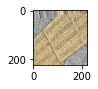

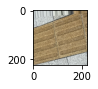

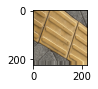

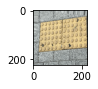

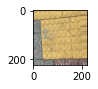

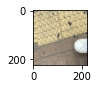

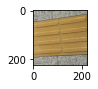

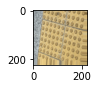

In [ ]:
for i in [0,2,4,6,8,10,12,14]:
  plt.figure(figsize=(1,1))
  plt.imshow(augmented_train_x[i])
  plt.show()

파일 저장

In [ ]:
np.save('/gdrive/MyDrive/zoom_in_aug', augmented_train_x)

저장된 파일이 잘 열리는지 확인해보는 부분이에요

In [ ]:
aug_x_load = np.load('/gdrive/MyDrive/zoom_in_aug.npy')

(11800, 224, 224, 3)


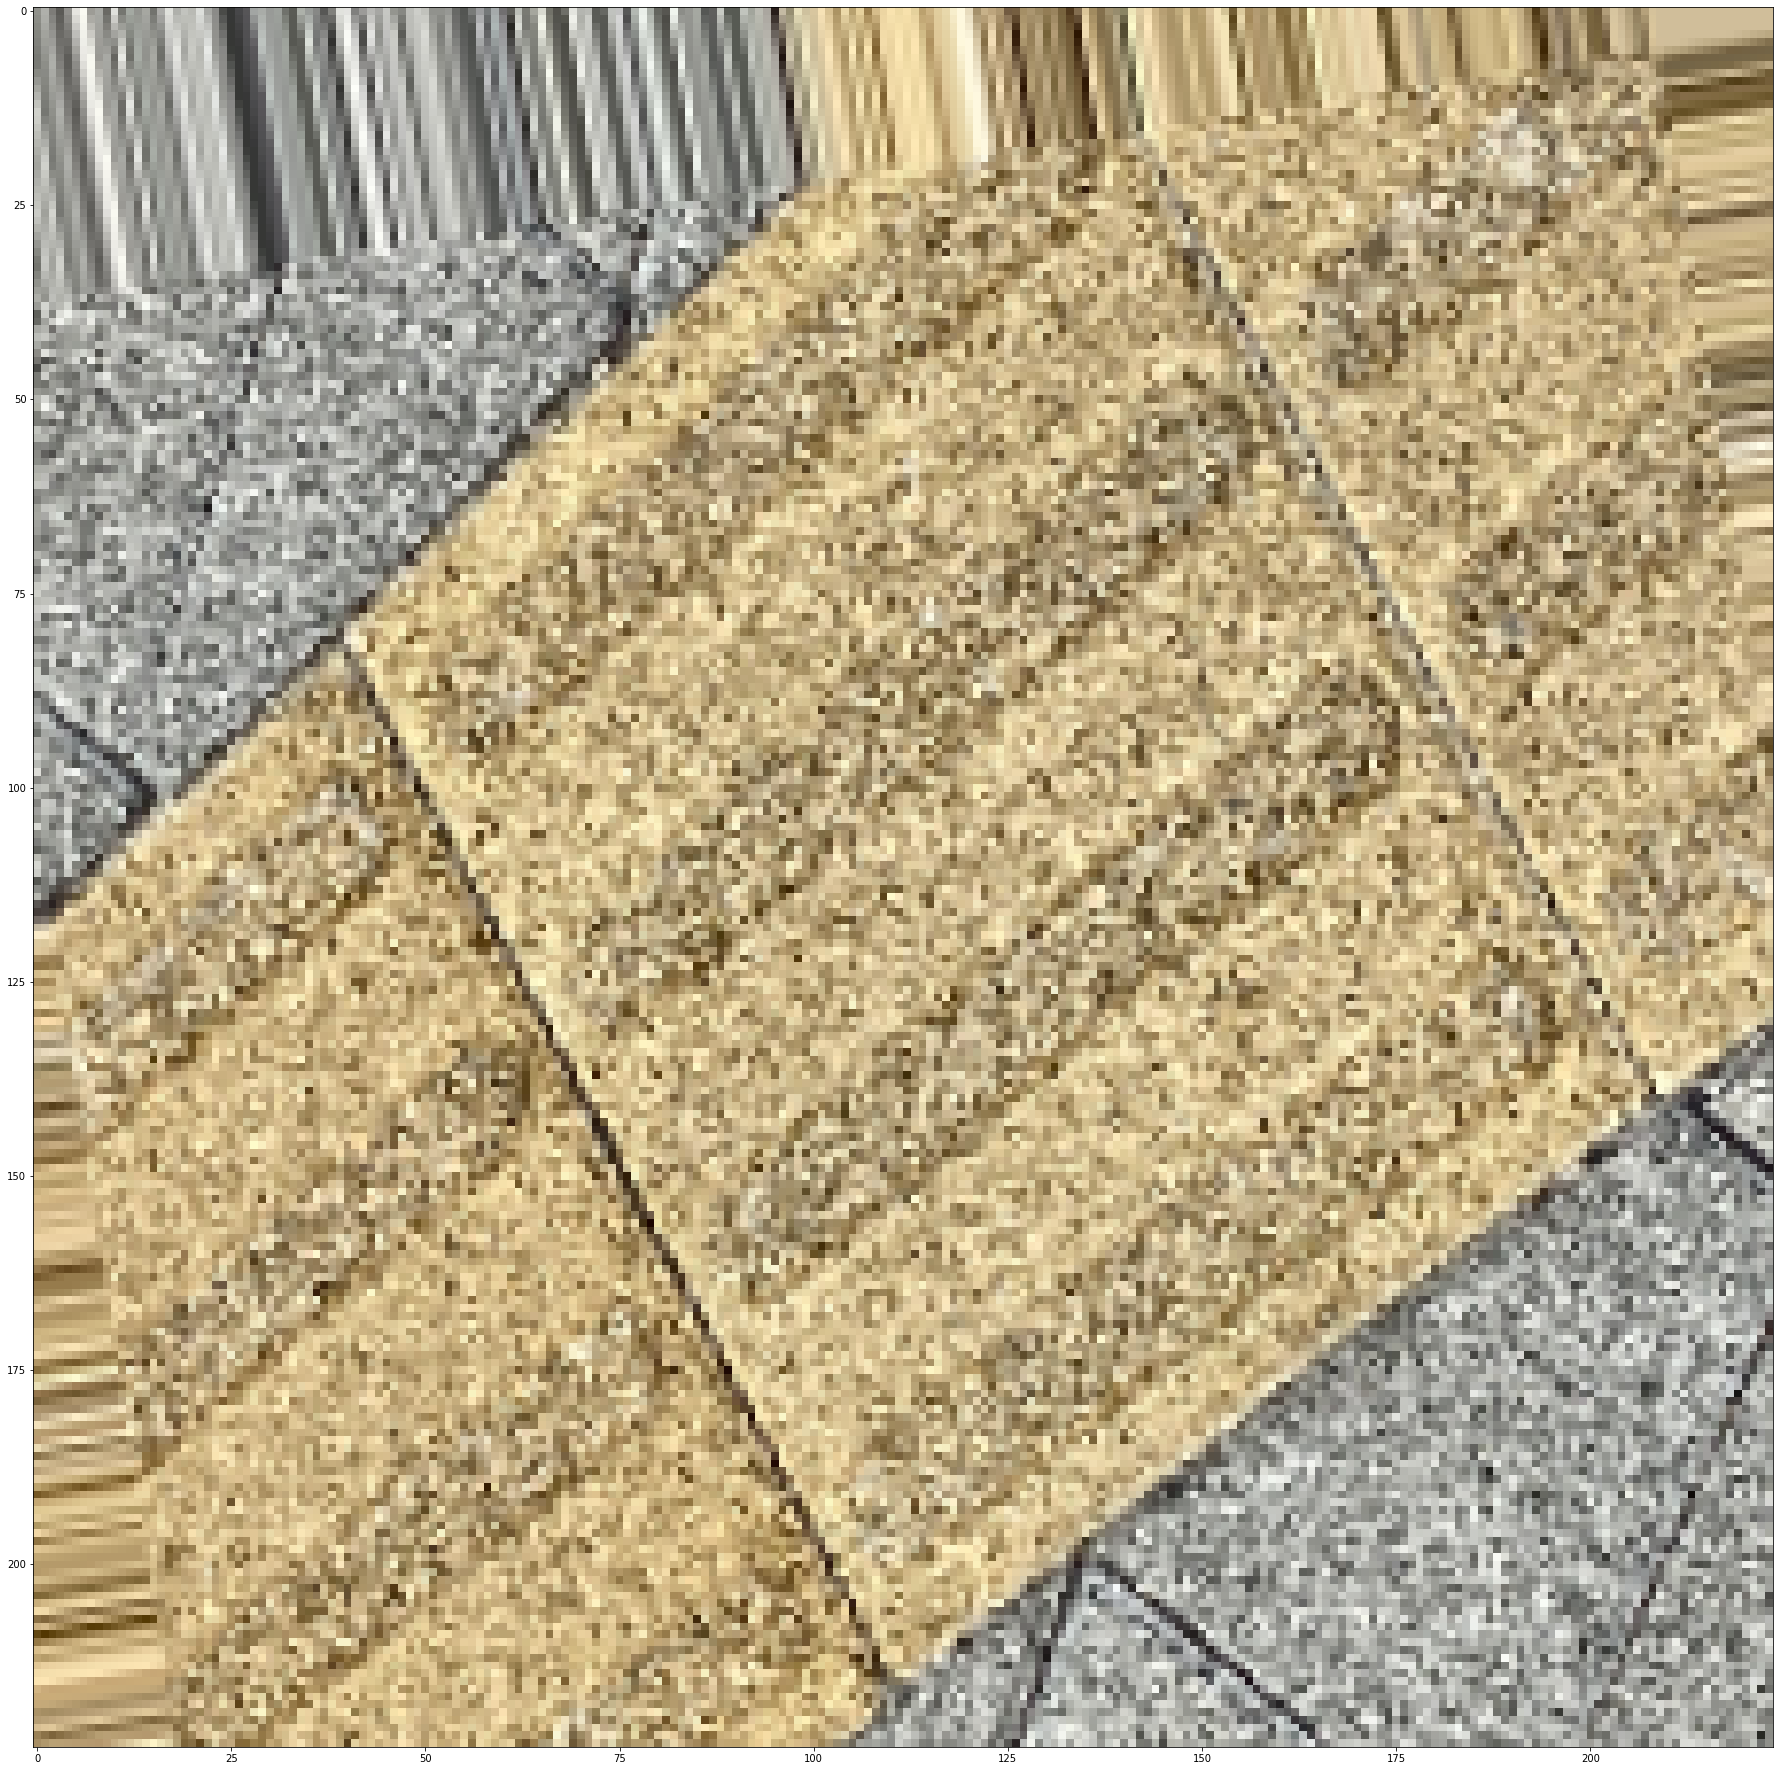

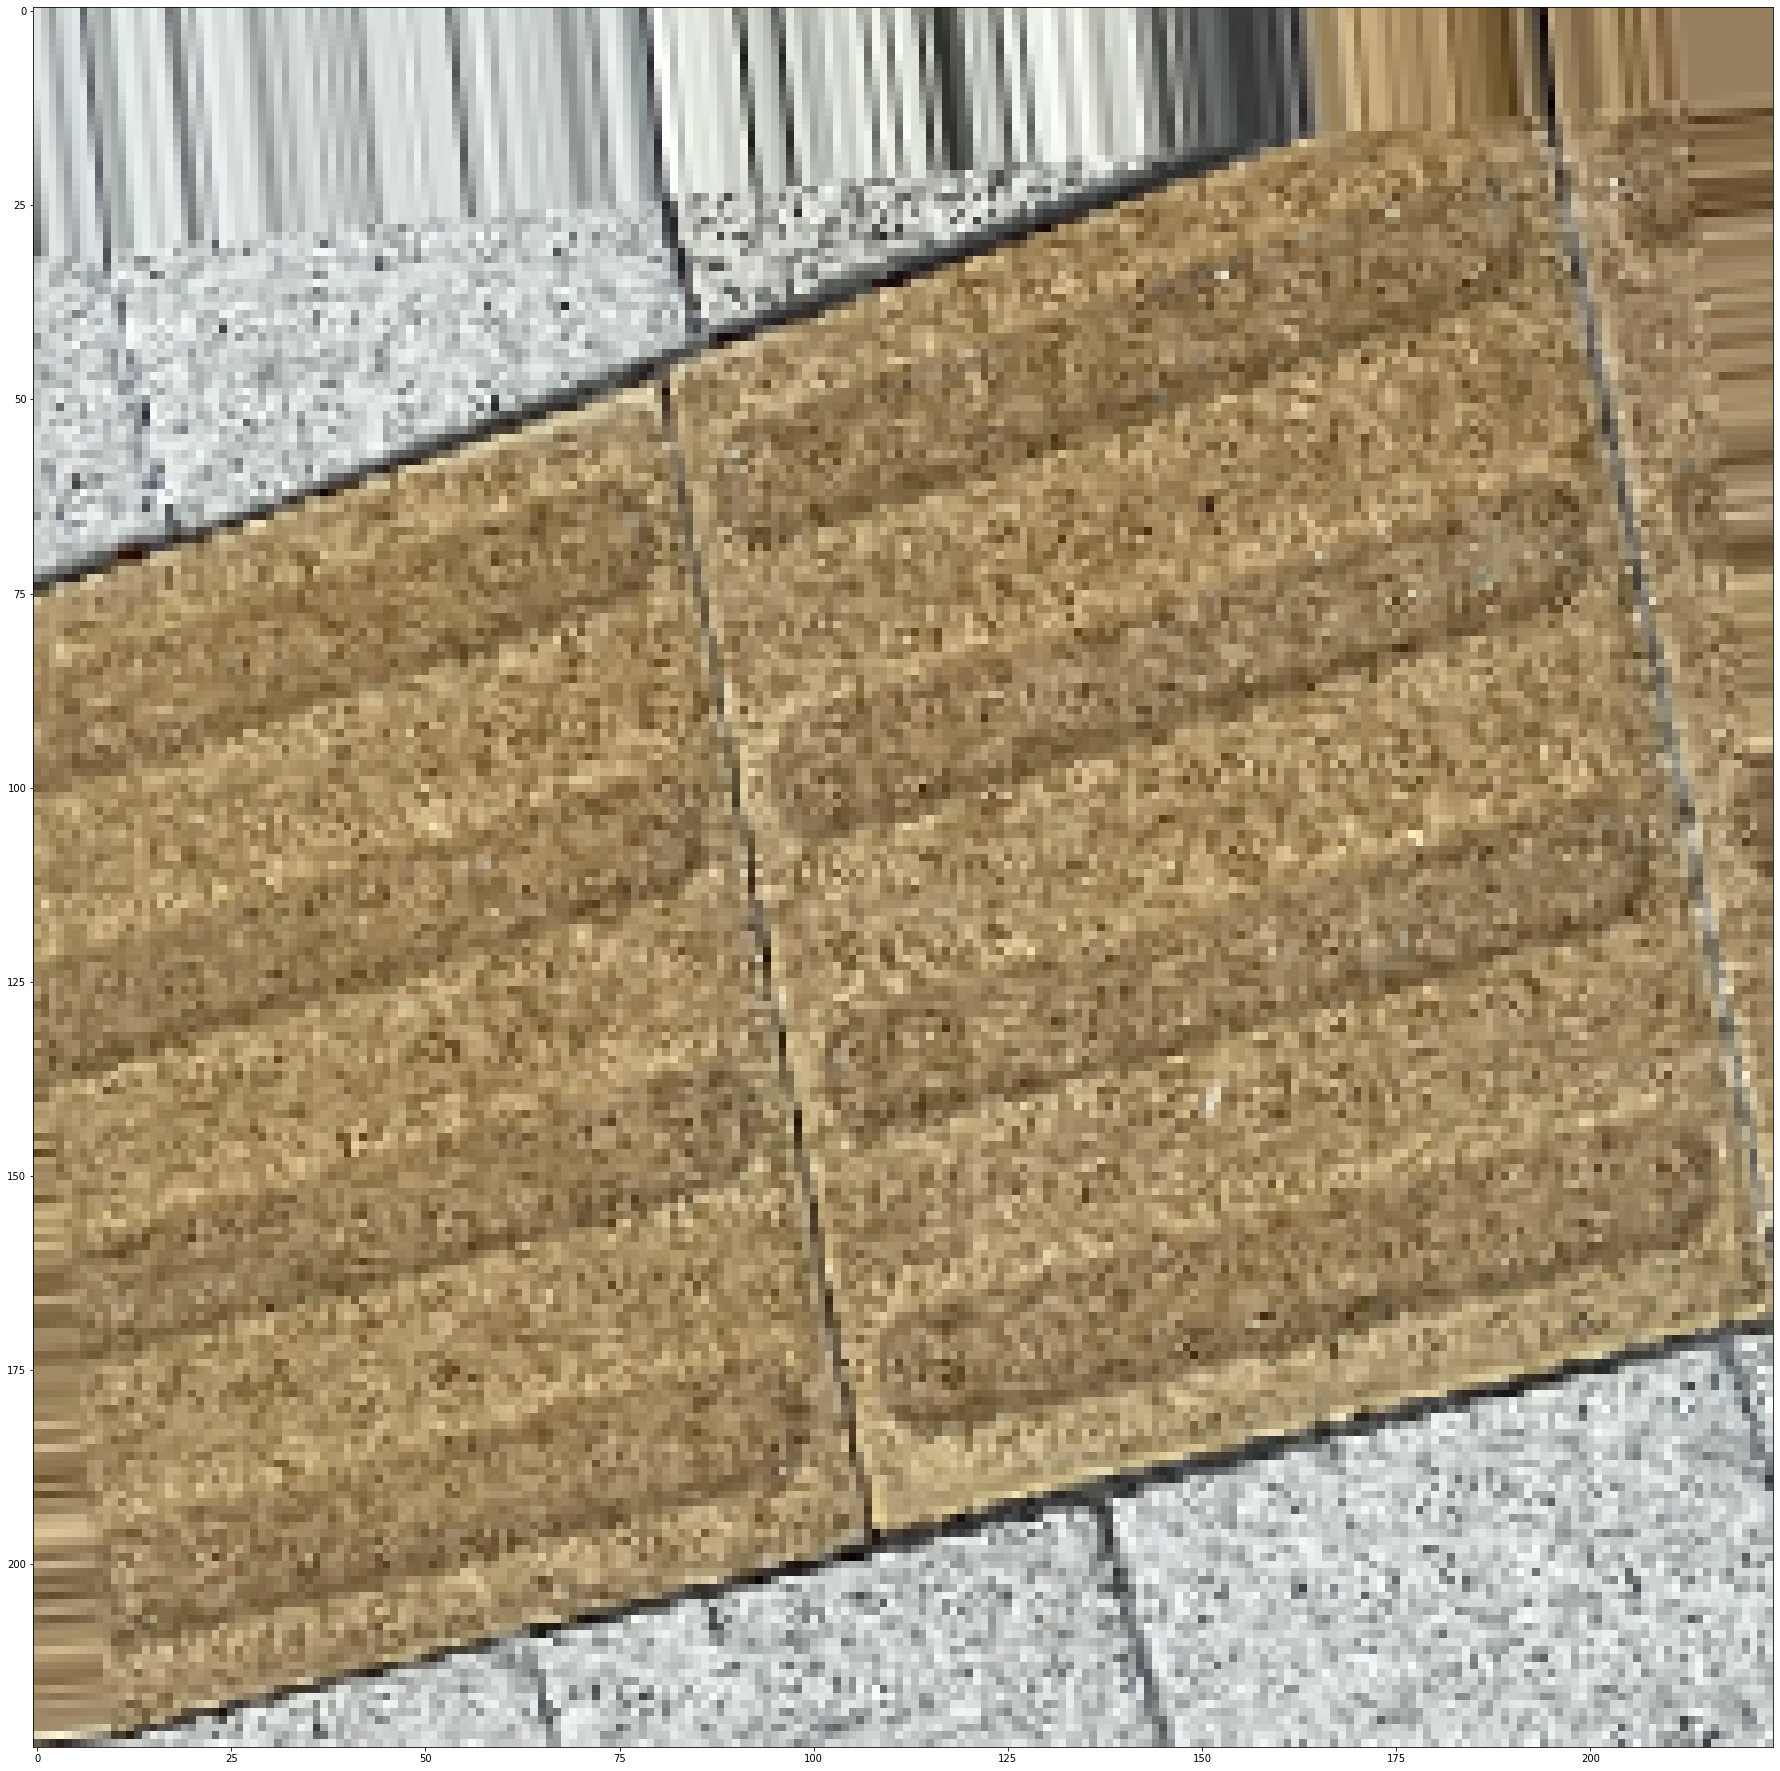

In [ ]:
print(aug_x_load.shape)
for i in [0,2]:
  plt.figure(figsize=(32,32))
  plt.imshow(aug_x_load[i])
  plt.show()

In [ ]:
print(augmented_train_x.shape)
print(np.max(augmented_train_x))
print(np.min(augmented_train_x))

(11800, 224, 224, 3)
1.0
0.0
